# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [ ]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)

# Separate features and target
X = df.drop(columns="class")
y = df["class"]

100%|██████████| 652k/652k [00:00<00:00, 80.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/wenruliu/adult-income-dataset/versions/2


   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split data into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("\nProcessed Training set shape:", X_train_processed.shape)
print("Processed Validation set shape:", X_val_processed.shape)
print("Processed Test set shape:", X_test_processed.shape)

Training set shape: (34189, 14) (34189,)
Validation set shape: (7326, 14) (7326,)
Test set shape: (7327, 14) (7327,)

Processed Training set shape: (34189, 108)
Processed Validation set shape: (7326, 108)
Processed Test set shape: (7327, 108)



## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define a simple neural network model
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid') # Binary classification
    ])
    return model

# Train the model with SGD optimizer
model_sgd = build_model()
model_sgd.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Convert target variable to integer (0 or 1) for binary crossentropy
y_train_int = (y_train == '>50K').astype(int)
y_val_int = (y_val == '>50K').astype(int)

history_sgd = model_sgd.fit(X_train_processed, y_train_int,
                            epochs=20,
                            batch_size=32,
                            validation_data=(X_val_processed, y_val_int),
                            verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7701 - loss: 0.4756 - val_accuracy: 0.8421 - val_loss: 0.3440
Epoch 2/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8354 - loss: 0.3533 - val_accuracy: 0.8524 - val_loss: 0.3247
Epoch 3/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8428 - loss: 0.3327 - val_accuracy: 0.8559 - val_loss: 0.3172
Epoch 4/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8450 - loss: 0.3286 - val_accuracy: 0.8569 - val_loss: 0.3138
Epoch 5/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8437 - loss: 0.3296 - val_accuracy: 0.8574 - val_loss: 0.3115
Epoch 6/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8499 - loss: 0.3227 - val_accuracy: 0.8576 - val_loss: 0.3098
Epoch 7/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8486 - loss: 0.3239 - val_accuracy: 0.8580 - val_loss: 0.3095
Epoch 8/20
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8491 - loss: 0.3255 - 

## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?

In [ ]:
# Train the model with batch size 1
model_bs1 = build_model()
model_bs1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history_bs1 = model_bs1.fit(X_train_processed, y_train_int,
                            epochs=20,
                            batch_size=1,
                            validation_data=(X_val_processed, y_val_int),
                            verbose=1)

# Train the model with batch size 128
model_bs128 = build_model()
model_bs128.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

history_bs128 = model_bs128.fit(X_train_processed, y_train_int,
                              epochs=20,
                              batch_size=128,
                              validation_data=(X_val_processed, y_val_int),
                              verbose=1)

# Train the model with batch size 1024
model_bs1024 = build_model()
model_bs1024.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

history_bs1024 = model_bs1024.fit(X_train_processed, y_train_int,
                                epochs=20,
                                batch_size=1024,
                                validation_data=(X_val_processed, y_val_int),
                                verbose=1)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34189/34189 ━━━━━━━━━━━━━━━━━━━━ 97s 3ms/step - accuracy: 0.8376 - loss: 0.3516 - val_accuracy: 0.8535 - val_loss: 0.3175
Epoch 2/20
34189/34189 ━━━━━━━━━━━━━━━━━━━━ 130s 2ms/step - accuracy: 0.8550 - loss: 0.3152 - val_accuracy: 0.8654 - val_loss: 0.3108
Epoch 3/20
34189/34189 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.8519 - loss: 0.3163 - val_accuracy: 0.8623 - val_loss: 0.3069
Epoch 4/20
34189/34189 ━━━━━━━━━━━━━━━━━━━━ 150s 3ms/step - accuracy: 0.8502 - loss: 0.3179 - val_accuracy: 0.8631 - val_loss: 0.3056
Epoch 5/20
34189/34189 ━━━━━━━━━━━━━━━━━━━━ 144s 3ms/step - accuracy: 0.8523 - loss: 0.3144 - val_accuracy: 0.8628 - val_loss: 0.3073
Epoch 6/20
34189/34189 ━━━━━━━━━━━━━━━━━━━━ 139s 3ms/step - accuracy: 0.8582 - loss: 0.3100 - val_accuracy: 0.8624 - val_loss: 0.3062
Epoch 7/20
34189/34189 ━━━━━━━━━━━━━━━━━━━━ 146s 3ms/step - accuracy: 0.8596 - loss: 0.3035 - val_accuracy: 0.8635 - val_loss: 0.3070
Epoch 8/20
34189/34189 ━━━━━━━━━━━━━━━━━━━━ 132s 2ms/step - accuracy: 0.857


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


In [ ]:
# Define a larger neural network model
def build_large_model():
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_train_processed.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Train the large model without regularization
large_model_no_reg = build_large_model()
large_model_no_reg.compile(optimizer='adam', # Using Adam for potentially faster convergence
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

history_large_no_reg = large_model_no_reg.fit(X_train_processed, y_train_int,
                                              epochs=50, # Train for more epochs to observe overfitting
                                              batch_size=32,
                                              validation_data=(X_val_processed, y_val_int),
                                              verbose=1)

Epoch 1/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8373 - loss: 0.3428 - val_accuracy: 0.8608 - val_loss: 0.3098
Epoch 2/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8567 - loss: 0.3102 - val_accuracy: 0.8583 - val_loss: 0.3122
Epoch 3/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8604 - loss: 0.3036 - val_accuracy: 0.8630 - val_loss: 0.3059
Epoch 4/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8623 - loss: 0.2929 - val_accuracy: 0.8616 - val_loss: 0.3051
Epoch 5/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8677 - loss: 0.2863 - val_accuracy: 0.8630 - val_loss: 0.3102
Epoch 6/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8652 - loss: 0.2894 - val_accuracy: 0.8606 - val_loss: 0.3100
Epoch 7/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8657 - loss: 0.2841 - val_accuracy: 0.8605 - val_loss: 0.3141
Epoch 8/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8725 - loss: 0.2735 - 

## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

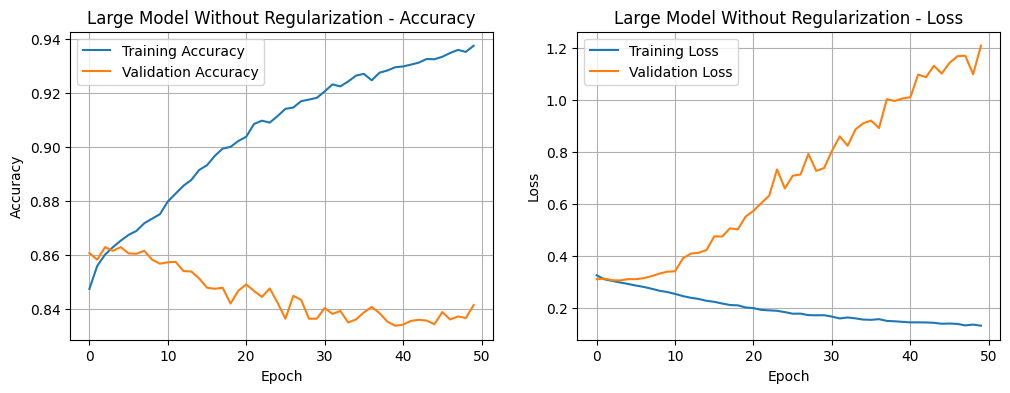

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

# Plot the history for the large model without regularization
plot_history(history_large_no_reg, 'Large Model Without Regularization')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Train the large model with Early Stopping
large_model_early_stopping = build_large_model() # Use the same large model structure
large_model_early_stopping.compile(optimizer='adam',
                                    loss='binary_crossentropy',
                                    metrics=['accuracy'])

# Define the Early Stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=10,        # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

history_large_early_stopping = large_model_early_stopping.fit(X_train_processed, y_train_int,
                                                            epochs=100, # Train for a large number of epochs
                                                            batch_size=32,
                                                            validation_data=(X_val_processed, y_val_int),
                                                            callbacks=[early_stopping_callback], # Add the callback
                                                            verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1069/1069 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8381 - loss: 0.3482 - val_accuracy: 0.8606 - val_loss: 0.3072
Epoch 2/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8521 - loss: 0.3132 - val_accuracy: 0.8630 - val_loss: 0.3042
Epoch 3/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8608 - loss: 0.3034 - val_accuracy: 0.8612 - val_loss: 0.3094
Epoch 4/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8586 - loss: 0.3029 - val_accuracy: 0.8647 - val_loss: 0.3065
Epoch 5/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8658 - loss: 0.2911 - val_accuracy: 0.8597 - val_loss: 0.3089
Epoch 6/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8670 - loss: 0.2873 - val_accuracy: 0.8630 - val_loss: 0.3072
Epoch 7/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8693 - loss: 0.2801 - val_accuracy: 0.8609 - val_loss: 0.3134
Epoch 8/100
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8737 - loss: 0.2733 - val

In [ ]:
from tensorflow.keras import regularizers

# Train the large model with L2 regularization
def build_large_model_l2():
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_train_processed.shape[1],),
                           kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.Dense(64, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

large_model_l2 = build_large_model_l2()
large_model_l2.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

history_large_l2 = large_model_l2.fit(X_train_processed, y_train_int,
                                      epochs=50,
                                      batch_size=32,
                                      validation_data=(X_val_processed, y_val_int),
                                      verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8335 - loss: 0.5203 - val_accuracy: 0.8478 - val_loss: 0.3557
Epoch 2/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8512 - loss: 0.3440 - val_accuracy: 0.8527 - val_loss: 0.3422
Epoch 3/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8541 - loss: 0.3337 - val_accuracy: 0.8616 - val_loss: 0.3208
Epoch 4/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8527 - loss: 0.3294 - val_accuracy: 0.8605 - val_loss: 0.3233
Epoch 5/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8554 - loss: 0.3231 - val_accuracy: 0.8642 - val_loss: 0.3191
Epoch 6/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8567 - loss: 0.3209 - val_accuracy: 0.8595 - val_loss: 0.3194
Epoch 7/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8572 - loss: 0.3206 - val_accuracy: 0.8586 - val_loss: 0.3189
Epoch 8/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8582 - loss: 0.3204 -

In [ ]:
# Train the large model with Dropout
def build_large_model_dropout():
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_train_processed.shape[1],)),
        keras.layers.Dropout(0.3), # Add dropout layers
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

large_model_dropout = build_large_model_dropout()
large_model_dropout.compile(optimizer='adam',
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

history_large_dropout = large_model_dropout.fit(X_train_processed, y_train_int,
                                                epochs=50,
                                                batch_size=32,
                                                validation_data=(X_val_processed, y_val_int),
                                                verbose=1)

Epoch 1/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8273 - loss: 0.3692 - val_accuracy: 0.8604 - val_loss: 0.3098
Epoch 2/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8480 - loss: 0.3259 - val_accuracy: 0.8561 - val_loss: 0.3146
Epoch 3/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8538 - loss: 0.3150 - val_accuracy: 0.8619 - val_loss: 0.3078
Epoch 4/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8594 - loss: 0.3040 - val_accuracy: 0.8636 - val_loss: 0.3064
Epoch 5/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8574 - loss: 0.3078 - val_accuracy: 0.8647 - val_loss: 0.3066
Epoch 6/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8584 - loss: 0.3015 - val_accuracy: 0.8650 - val_loss: 0.3056
Epoch 7/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8600 - loss: 0.3017 - val_accuracy: 0.8619 - val_loss: 0.3060
Epoch 8/50
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8629 - loss: 0.2991 - 

## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?

## Part 5: Reflection

Based on the exercises and general deep learning principles, here's a summary of what we've learned and how we might approach a new tabular dataset:

### Summary of Learnings:

*   **The role of optimizers:** Optimizers are crucial for updating model weights during training to minimize the loss function. Different optimizers like SGD, SGD with Momentum, and Adam have varying convergence characteristics and can impact training speed and final performance. Adam often converges faster and can achieve better performance due to its adaptive learning rates.
*   **The effect of batch size:** Batch size influences the trade-off between training speed, memory usage, and the noise in gradient updates. Smaller batch sizes introduce more noise, which can sometimes help in escaping local minima and improving generalization, but they also lead to slower training. Larger batch sizes provide more stable gradient updates and faster training per epoch but might get stuck in sharp local minima.
*   **Regularization methods:** Techniques like L2 regularization and Dropout help prevent overfitting by adding penalties to the model complexity (L2) or randomly dropping units during training (Dropout). This encourages the model to learn more robust and generalizable features.
*   **Early stopping:** Early stopping is a form of regularization that monitors the model's performance on a validation set and stops training when the performance starts to degrade (indicating overfitting). This prevents the model from learning the training data too well and losing generalization ability.
*   **Train/validation/test splits:** Splitting the data into distinct sets for training, validation, and testing is essential for evaluating model performance accurately and avoiding overfitting. The training set is used for model training, the validation set for hyperparameter tuning and monitoring during training (like early stopping), and the test set for a final, unbiased evaluation of the trained model's performance on unseen data.

### Choices for a New Tabular Dataset:

If training a deep learning model on a new tabular dataset, here are some initial choices I would make and why:

*   **Optimizer:** I would likely start with **Adam**. Adam is generally a good default optimizer for many deep learning tasks, including those with tabular data. Its adaptive learning rates often lead to faster convergence and good performance without extensive manual tuning. However, I would also consider experimenting with other optimizers like SGD with Momentum or potentially more advanced optimizers if Adam doesn't yield satisfactory results.
*   **Batch size:** I would start with a moderate batch size, such as **32 or 64**. This provides a reasonable balance between training speed and the noise in gradient updates. Larger batch sizes could be explored for faster training if computational resources allow, while smaller batch sizes might be considered if regularization is proving insufficient or if the dataset is very noisy.
*   **Regularization:** I would incorporate both **L2 regularization and Dropout**. These are effective and commonly used regularization techniques for neural networks. I would apply L2 regularization to the dense layers and add Dropout layers after activation functions. The specific regularization strengths (L2 lambda value) and dropout rates would be treated as hyperparameters to be tuned during validation.
*   **Early stopping:** I would definitely use **Early Stopping**. This is a simple yet powerful technique to prevent overfitting and find the optimal number of training epochs. I would monitor the validation loss and set a reasonable patience value (e.g., 10-20 epochs) to stop training if the validation loss does not improve. Restoring the best weights is also crucial to get the model with the best validation performance.
*   **Data splitting strategy:** The **70/15/15 split** for training, validation, and testing used in this assignment is a reasonable starting point for many datasets. This provides sufficient data for training, a dedicated set for monitoring and tuning, and a separate set for final evaluation. However, the optimal split can depend on the dataset size. For very large datasets, a smaller validation/test split might be sufficient, while for smaller datasets, techniques like k-fold cross-validation on the training set might be considered for more robust evaluation during development.

These would be my initial choices, but it's important to remember that hyperparameter tuning and experimentation are crucial steps in finding the best configuration for any specific dataset and task.